# XCS Algorithm

In [1805]:
import random
import logging
import pandas as pd
from xcs import XCSAlgorithm
from xcs.scenarios import MUXProblem, ScenarioObserver

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Import Dataset

In [1750]:
datasetCancer = pd.read_csv('./breast-cancer-wisconsin.csv', header=None)

In [1751]:
datasetCancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Drop Sample Code Number(ID Number)

In [1752]:
datasetCancer = datasetCancer.drop(columns=0, axis=1)

#### Splitting Data for Testing and Training

In [1753]:
train, test = train_test_split(datasetCancer, test_size=0.2)

In [1754]:
train.shape

(559, 10)

In [1755]:
test.shape

(140, 10)

In [1756]:
print(train.head())

     1   2   3   4   5   6   7   8   9   10
267   3   3   5   2   3  10   7   1   1   4
692   3   1   1   1   2   1   1   1   1   2
588   9   8   8   9   6   3   4   1   1   4
627   2   1   1   1   2   5   1   1   1   2
372   4   1   2   1   2   1   2   1   1   2


In [1757]:
train.shape

(559, 10)

#### Converting empty string values in the column 

In [1758]:
def convertEmptyStringValues(val):
    if val == '?':
        return '0'
    else:
        return val

#### Converting Class type to String value - True for Benign and False for Malignant 

In [1759]:
def convertClassValues(val):
    if val == 2:
        return True
    elif val == 4:
        return False

#### Converting non numeric bare-nuclei values to numeric type

In [1760]:
train[6] = train.apply(lambda row: convertEmptyStringValues(row[6]), axis=1)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1761]:
test[6] = test.apply(lambda row: convertEmptyStringValues(row[6]), axis=1)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1762]:
train[6] = train[6].apply(pd.to_numeric)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1763]:
test[6] = test[6].apply(pd.to_numeric)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1764]:
train[10] = train.apply(lambda row: convertClassValues(row[10]), axis=1)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1765]:
test[10] = test.apply(lambda row: convertClassValues(row[10]), axis=1)

/Users/ashwini/anaconda3/envs/tensorflow-a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1766]:
train.shape

(559, 10)

In [1767]:
test.shape

(140, 10)

In [1768]:
train_res = train[10]

In [1769]:
test_res = test[10]

In [1770]:
train_res.shape

(559,)

In [1771]:
train.drop(train.columns[9],axis=1,inplace=True)

In [1772]:
test.drop(test.columns[9],axis=1,inplace=True)

In [1773]:
train

,1,2,3,4,5,6,7,8,9
267,3,3,5,2,3,10,7,1,1
692,3,1,1,1,2,1,1,1,1
588,9,8,8,9,6,3,4,1,1
627,2,1,1,1,2,5,1,1,1
372,4,1,2,1,2,1,2,1,1
73,9,4,5,10,6,10,4,8,1
491,5,8,9,4,3,10,7,1,1
539,6,1,1,1,2,1,2,1,1
646,1,2,2,1,2,1,1,1,1
92,4,1,1,1,2,1,3,1,1


In [1774]:
test

,1,2,3,4,5,6,7,8,9
580,5,1,2,1,2,1,2,1,1
75,1,1,2,1,2,2,4,2,1
518,3,1,2,2,2,1,1,1,1
313,1,1,1,1,2,1,1,1,1
652,5,1,1,1,2,1,2,2,1
543,4,1,1,1,2,1,2,1,1
374,3,1,2,1,2,1,2,1,1
540,5,1,1,1,2,2,2,1,1
320,7,6,3,2,5,10,7,4,6
163,1,1,1,2,1,3,1,1,7


#### Converting training and testing values into list

In [1775]:
train = train.values.tolist()

In [1776]:
test = test.values.tolist()

In [1777]:
train[0] 

[3, 3, 5, 2, 3, 10, 7, 1, 1]

In [1778]:
len(train[0]) #columns - attributes 

9

In [1779]:
len(train)#rows - entries

559

#### Converting the training and testing list values to binary values

In [1780]:
train_data_1 = list(list("{0:04b}".format(elem) for elem in row) for row in train) # formatting binary values

In [1781]:
test_data_1 = list(list("{0:04b}".format(elem) for elem in row) for row in test) # formatting binary values

In [1782]:
train_data_1

[['0011', '0011', '0101', '0010', '0011', '1010', '0111', '0001', '0001'],
 ['0011', '0001', '0001', '0001', '0010', '0001', '0001', '0001', '0001'],
 ['1001', '1000', '1000', '1001', '0110', '0011', '0100', '0001', '0001'],
 ['0010', '0001', '0001', '0001', '0010', '0101', '0001', '0001', '0001'],
 ['0100', '0001', '0010', '0001', '0010', '0001', '0010', '0001', '0001'],
 ['1001', '0100', '0101', '1010', '0110', '1010', '0100', '1000', '0001'],
 ['0101', '1000', '1001', '0100', '0011', '1010', '0111', '0001', '0001'],
 ['0110', '0001', '0001', '0001', '0010', '0001', '0010', '0001', '0001'],
 ['0001', '0010', '0010', '0001', '0010', '0001', '0001', '0001', '0001'],
 ['0100', '0001', '0001', '0001', '0010', '0001', '0011', '0001', '0001'],
 ['0001', '0001', '0001', '0001', '0010', '0001', '0011', '0001', '0001'],
 ['0101', '0010', '0010', '0010', '0001', '0001', '0010', '0001', '0001'],
 ['0101', '0001', '0010', '0001', '0010', '0001', '0001', '0001', '0001'],
 ['0010', '0001', '0001',

In [1783]:
test_data_1

[['0101', '0001', '0010', '0001', '0010', '0001', '0010', '0001', '0001'],
 ['0001', '0001', '0010', '0001', '0010', '0010', '0100', '0010', '0001'],
 ['0011', '0001', '0010', '0010', '0010', '0001', '0001', '0001', '0001'],
 ['0001', '0001', '0001', '0001', '0010', '0001', '0001', '0001', '0001'],
 ['0101', '0001', '0001', '0001', '0010', '0001', '0010', '0010', '0001'],
 ['0100', '0001', '0001', '0001', '0010', '0001', '0010', '0001', '0001'],
 ['0011', '0001', '0010', '0001', '0010', '0001', '0010', '0001', '0001'],
 ['0101', '0001', '0001', '0001', '0010', '0010', '0010', '0001', '0001'],
 ['0111', '0110', '0011', '0010', '0101', '1010', '0111', '0100', '0110'],
 ['0001', '0001', '0001', '0010', '0001', '0011', '0001', '0001', '0111'],
 ['0010', '0011', '0010', '0010', '0010', '0010', '0011', '0001', '0001'],
 ['1000', '1010', '1010', '1010', '0101', '1010', '1000', '1010', '0110'],
 ['0101', '0111', '1010', '0110', '0101', '1010', '0111', '0101', '0001'],
 ['0100', '0001', '0001',

#### Concatenate all the values in the list

In [1784]:
train_data_2 = list(''.join(row) for row in train_data_1)

In [1785]:
test_data_2 = list(''.join(row) for row in test_data_1)

In [1786]:
train_data_2

['001100110101001000111010011100010001',
 '001100010001000100100001000100010001',
 '100110001000100101100011010000010001',
 '001000010001000100100101000100010001',
 '010000010010000100100001001000010001',
 '100101000101101001101010010010000001',
 '010110001001010000111010011100010001',
 '011000010001000100100001001000010001',
 '000100100010000100100001000100010001',
 '010000010001000100100001001100010001',
 '000100010001000100100001001100010001',
 '010100100010001000010001001000010001',
 '010100010010000100100001000100010001',
 '001000010001000100100001000100010001',
 '101010101010001110101000100000010001',
 '001100010001000100100001001100010001',
 '001000010001000100010001001100010001',
 '001100010001000100010001001000010001',
 '000100010001000100100001001100010001',
 '010110101010011010101010101001100101',
 '001101000101001001101000010000010001',
 '000100100001001100100001000100100001',
 '011010101010001010001010011100110011',
 '001000010001000100100001001000100001',
 '01010110011010

In [1787]:
test_data_2

['010100010010000100100001001000010001',
 '000100010010000100100010010000100001',
 '001100010010001000100001000100010001',
 '000100010001000100100001000100010001',
 '010100010001000100100001001000100001',
 '010000010001000100100001001000010001',
 '001100010010000100100001001000010001',
 '010100010001000100100010001000010001',
 '011101100011001001011010011101000110',
 '000100010001001000010011000100010111',
 '001000110010001000100010001100010001',
 '100010101010101001011010100010100110',
 '010101111010011001011010011101010001',
 '010000010001000100100001000100010001',
 '100010101010101001101010101010100001',
 '010001010101100001101010101001110001',
 '100010101010011110101010011100111000',
 '000100010001000100100001001000010001',
 '010100110010000100110001000100010001',
 '010100010001000100100001001100010001',
 '000100010001000100100001001100010001',
 '100001010101010100101010010000110001',
 '000100010001000100100001001000010001',
 '100001010110001000111010011001100001',
 '10011010101000

### XCS Algorithm implemetation

In [1788]:
from xcs.scenarios import PreClassifiedData, UnclassifiedData

In [1789]:
algorithm = XCSAlgorithm()    # Instance of accuracy based LCS

In [1795]:
# Set algorithm parameters
algorithm.exploration_probability = 0.01
algorithm.crossover_probability   = 0.2
algorithm.mutation_probability    = 0.001
algorithm.discount_factor = 0.01
algorithm.do_ga_subsumption = True
algorithm.do_action_set_subsumption = True

In [1796]:
# Training the data
X = train_data_2
y = train_res

#Checking if the train input and output set is equal
assert len(X) == len(y)

# Generating the scenario env
scenario = PreClassifiedData(
    X,
    y
)

# Training the model
model = algorithm.run(scenario)

In [ ]:
print(model)

#### Rule values of the trained model

In [1797]:
for rule in model:
    if rule.fitness > .5 and rule.experience >= 10:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

0#010##1####00#10#10000##001##01#001 => True  [0.87701]
00#1###1#001#0##0001#00#####0#####01 => True  [0.78148]


In [1798]:
# Testing trained data
inp = train_data_2
actop = train_res

# Generating the scenario env
scenario = UnclassifiedData(inp)

# running the scenario for test dataset
model.run(scenario, learn=False)

# Fetching the predicted output values
preop = scenario.get_classifications()

# Comparing the predicted value and actual value
accuracy_score(actop, preop)

0.7638640429338104

### Testing the model

In [1799]:
# Testing data
X = test_data_2
yActual = test_res

# Generating the scenario env
scenario = UnclassifiedData(X)

# running the scenario for test dataset
model.run(scenario, learn=False)

# Fetching the predicted output values
yPredicted = scenario.get_classifications()

In [1802]:
# Comparing the predicted value and actual value
accuracy_score(yActual, yPredicted)

0.7142857142857143

In [1804]:
f1_score(yActual, yPredicted, average=None)

array([0.54545455, 0.79166667])

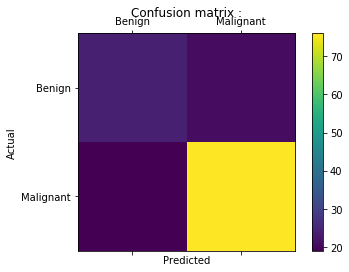

In [1807]:
confusion_matrix_val = confusion_matrix(yActual, yPredicted)
labels = ['Benign', 'Malignant']

# Create the plot figure 
fig = plt.figure()

# Comfusion Matrix subplot
subplt = fig.add_subplot(111)
csubplt = subplt.matshow(confusion_matrix_val)

plt.title('Confusion matrix :')
fig.colorbar(csubplt)

subplt.set_xticklabels([''] + labels)
subplt.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion

The accuracy score got using Genetic Programming was 66.5% where as the accuracy score got by implementing XCS algorithm is 71.5%.

### Reference: 

1. https://pythonhosted.org/xcs/
2. https://github.com/hosford42/xcs/blob/master/xcs/scenarios.py#L595